In [6]:
import mlflow
import os
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from evaluation import avg_metrics

In [7]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("temp experiemnts")

<Experiment: artifact_location='/home/fatcat/Project/Experiments/mlruns/3', creation_time=1717504383188, experiment_id='3', last_update_time=1717504383188, lifecycle_stage='active', name='temp experiemnts', tags={}>

In [8]:
TEST_DATA_DIR = "data/test_data/"
TEST_GT_DIR = TEST_DATA_DIR + "test_gt"
TEST_IMG_DIR = TEST_DATA_DIR + "Images"
NUM_FILES = 2

In [9]:
def get_file_names_from_folder(folder_path, num_files):
    files = os.listdir(folder_path)
    files = [f for f in files if os.path.isfile(os.path.join(folder_path, f))]
    files = sorted(files)
    return files[:num_files]


def get_ground_truths(dir, file_names):
    columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'script', 'text']
    GTs = []
    for file_name in file_names:
        print(f"extracting {dir}/{file_name}")
        # get round truth as dataframe
        df = pd.read_csv(dir+'/'+file_name, delimiter=',', names=columns)
        
        # get df in format for evaluation
        gt = []
        for _, item in df.iterrows():
            gt.append(([[item.x1, item.y1], [item.x2, item.y2], [item.x3, item.y3], [item.x4, item.y4]], item.text))
            
        GTs.append(gt)
    return GTs


def get_images(dir, file_names):
    images = []
    print()
    for file_name in file_names:
        print(f"extracting {dir}/{file_name}")
        image = np.asarray(Image.open(dir+'/'+ file_name).convert('RGB')) # Inference is not supported for images with alpha channel
        images.append(image)
    return images

def get_image(path):
    image = np.asarray(Image.open(path).convert('RGB')) # Inference is not supported for images with alpha channel
    return image


In [10]:
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow.db")

In [3]:

logged_model = 'runs:/a11b9a456a2a42cf859eb143fa40eb2b/glassrunner'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)


In [11]:
image_path = 'data/test_data/Images/tr_img_01200.jpg'
image = get_image(image_path)

In [12]:
preds =loaded_model.predict(image)

/home/fatcat/anaconda3/envs/mlflow-server/lib/python3.11/site-packages/glass/inference/glass_runner.py:133: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  image_tensor = torch.as_tensor(original_image.transpose((2, 0, 1)))
/home/fatcat/anaconda3/envs/mlflow-server/lib/python3.11/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [13]:
preds

[[([[655.5465087890625, 278.1545104980469],
    [973.88720703125, 284.02783203125],
    [972.230224609375, 373.8377380371094],
    [653.8895263671875, 367.96441650390625]],
   'GROVE'),
  ([[98.01776123046875, 253.68084716796875],
    [516.7345581054688, 268.2773132324219],
    [513.3653564453125, 364.926513671875],
    [94.6485595703125, 350.3300476074219]],
   'LOCUST'),
  ([[549.7171020507812, 274.3227844238281],
    [627.9052734375, 273.30560302734375],
    [629.0979614257812, 364.9856872558594],
    [550.9097900390625, 366.00286865234375]],
   'HISTORIC'),
  ([[648.6233520507812, 616.755126953125],
    [832.076904296875, 616.3633422851562],
    [832.4296264648438, 781.5313720703125],
    [648.97607421875, 781.9231567382812]],
   'STATE')]]

In [14]:
glass_model = loaded_model.unwrap_python_model()

In [15]:
glass_model.visualize()

In [ ]:
id = 1050
image_path = f'data/test_data/Images/tr_img_0{id}.jpg'
image = get_image(image_path)
preds = glass_model.predict(_,image)
glass_model.visualize()

In [ ]:
GTs = get_ground_truths(TEST_GT_DIR, [f"tr_img_0{id}.txt"])
avg_metrics(GTs, preds) 

In [ ]:
id = 1203
image_path = f'data/test_data/Images/tr_img_0{id}.jpg'
image = get_image(image_path)
preds = glass_model.predict(_,image)
glass_model.visualize()

In [ ]:
id = 1368
image_path = f'data/test_data/Images/tr_img_0{id}.jpg'
image = get_image(image_path)
preds = glass_model.predict(_,image)
glass_model.visualize()

In [7]:
id = 1465
image_path = f'data/test_data/Images/tr_img_0{id}.jpg'
image = get_image(image_path)
preds = glass_model.predict(_,image)
glass_model.visualize()

NameError: name 'glass_model' is not defined

In [8]:
# glass_model._config_path, glass_model._model_path

## Paddleocr model

In [17]:
logged_paddleocr = 'runs:/bdb2c42060fe431991b728dbebe71421/paddleocr'

# Load model as a PyFuncModel.
loaded_paddleocr = mlflow.pyfunc.load_model(logged_paddleocr)

preds = loaded_paddleocr.predict(image)

[2024/06/18 04:35:04] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/fatcat/Project/Experiments/mlruns/3/bdb2c42060fe431991b728dbebe71421/artifacts/paddleocr/artifacts/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/fatcat/Project/Experiments/mlruns/3/bdb2c42060fe431991b728dbebe71421/artifacts/p

In [19]:
GTs = get_ground_truths(TEST_GT_DIR, [f"tr_img_0{id}.txt"])
avg_metrics(GTs, [preds])

extracting data/test_data/test_gt/tr_img_01050.txt


(1.1388888888888888,
 5.666666666666667,
 0.6666666666666666,
 0.09090909090909091,
 0.16,
 0.3333333333333333,
 0.045454545454545456,
 0.08)

In [20]:
paddle_v4 = loaded_paddleocr.unwrap_python_model()

[[[[196.0, 35.0], [533.0, 9.0], [536.0, 50.0], [199.0, 76.0]], ('GASOLINE GRILL', 0.9717897176742554)], [[[200.0, 82.0], [230.0, 82.0], [230.0, 88.0], [200.0, 88.0]], ('NESESSSE', 0.6899586319923401)], [[[250.0, 127.0], [275.0, 126.0], [277.0, 274.0], [252.0, 275.0]], ('BURGERS', 0.995696485042572)]]


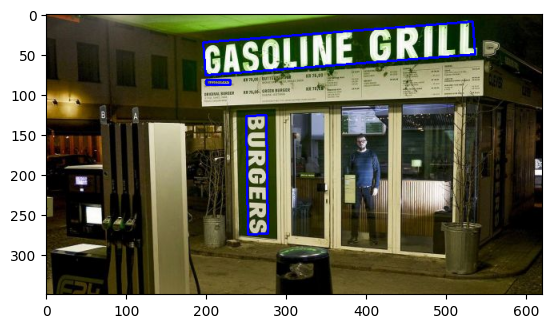

In [21]:
paddle_v4.visualize()

[2024/06/18 04:36:14] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/fatcat/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/fatcat/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

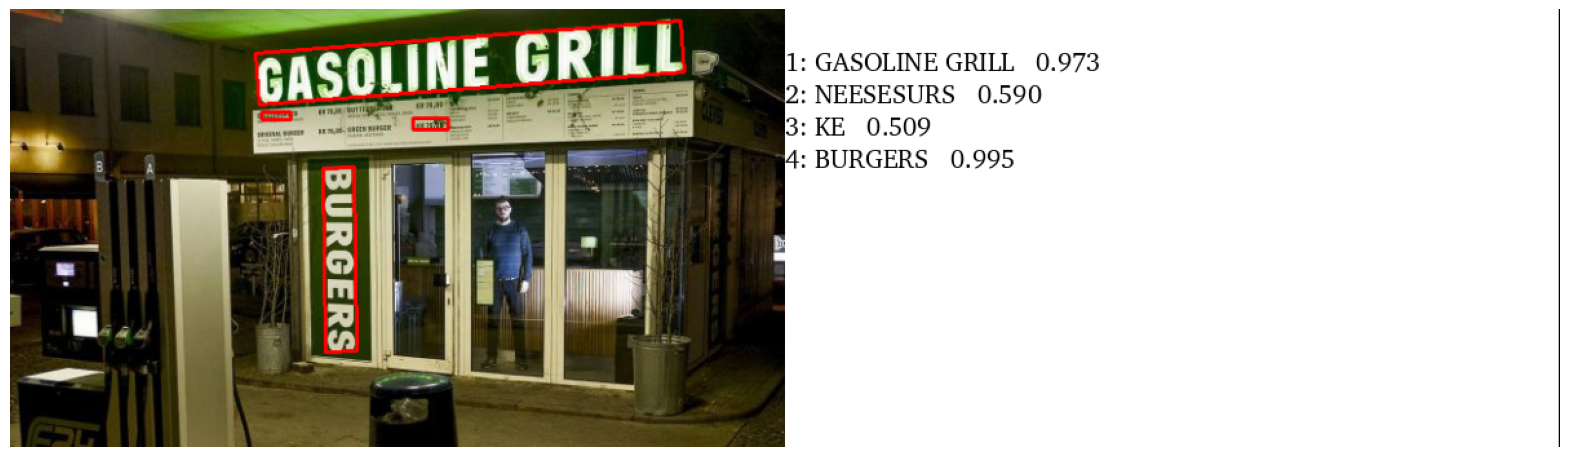

In [22]:
from paddleocr import PaddleOCR
from paddleocr.tools.infer.utility import draw_ocr
import matplotlib.pyplot as plt
from PIL import Image

# Khởi tạo mô hình OCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')


# Nhận diện văn bản
result = ocr.ocr(image_path, cls=True)

# Đọc ảnh
image = Image.open(image_path).convert('RGB')

# Tách kết quả dự đoán
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

# Vẽ kết quả lên ảnh
im_show = draw_ocr(image, boxes, txts, scores, font_path="fonts/latin.ttf")
im_show = Image.fromarray(im_show)

# Tăng kích thước hiển thị ảnh
plt.figure(figsize=(20, 15))  # Adjust the size as needed
plt.imshow(im_show)
plt.axis('off')
plt.show()


In [23]:
import mlflow

model = mlflow.pyfunc.load_model("runs:/bdb2c42060fe431991b728dbebe71421/paddleocr")
model.serve(port=5001, enable_mlserver=True)

[2024/06/18 04:43:41] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/fatcat/Project/Experiments/mlruns/3/bdb2c42060fe431991b728dbebe71421/artifacts/paddleocr/artifacts/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/fatcat/Project/Experiments/mlruns/3/bdb2c42060fe431991b728dbebe71421/artifacts/p

AttributeError: 'PyFuncModel' object has no attribute 'serve'